In [3]:
from __future__ import division, print_function, unicode_literals

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
import time
import re
import math
from docx import Document

# import packages for data visulatzation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# modeling routines from Scikit Learn packages for model develipment
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix , accuracy_score , classification_report, make_scorer,recall_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import regularizers

# obtain precision, recall, F1, and support metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# specify the set of classifiers being evaluated
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'

import warnings
warnings.filterwarnings("ignore")
# set KMP_DUPLICATE_LIB_OK=TRUE      #  Windows
# set up randam seed
random_seed = 55
import tensorflow as tf
import torch
import platform

from sklearn.impute import KNNImputer
import pickle
df_input = pd.read_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.1.csv")

In [4]:
model_data_RF = df_input.copy()
model_data_RF['count'] = model_data_RF.count(axis=1)
model_data_RF['count'].value_counts().sort_index()

9       20
10      31
11      90
12     460
13     737
14    1258
15    1482
16    1059
17    1008
18     802
19     723
20     535
21     338
22     285
23     228
24     173
25      68
26      15
Name: count, dtype: int64

In [5]:
model_data_RF = df_input.copy()
model_data_RF = model_data_RF.dropna(thresh=(model_data_RF.shape[1]-1)*0.4, axis=0)
model_data_RF

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
0,NaN,NaN,0.7,92.0,NaN,NaN,NaN,3.7,144.0,11.7,...,NaN,NaN,NaN,100.0,NaN,0.0,NaN,NaN,NaN,0
1,NaN,3.6,0.6,95.0,NaN,NaN,187.0,3.7,137.0,12.6,...,NaN,NaN,NaN,43.0,2.0,17.0,NaN,NaN,NaN,0
2,NaN,2.6,1.2,76.0,NaN,NaN,NaN,4.9,137.0,9.7,...,NaN,NaN,NaN,41.0,49.0,10.0,16.0,13.0,2.0,0
3,NaN,NaN,0.8,105.0,NaN,NaN,NaN,3.9,142.0,15.3,...,NaN,NaN,NaN,62.0,NaN,0.0,NaN,NaN,NaN,0
4,NaN,4.9,1.0,111.0,12.0,2.0,NaN,4.6,128.0,8.4,...,0.77,0.4,45.3,96.0,NaN,1.0,19.0,9.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,NaN,NaN,0.8,155.0,NaN,NaN,NaN,3.6,137.0,11.6,...,NaN,NaN,NaN,0.0,NaN,100.0,NaN,NaN,NaN,0
9308,NaN,NaN,0.7,140.0,NaN,NaN,180.0,3.7,140.0,13.0,...,NaN,NaN,NaN,1.0,NaN,90.0,NaN,NaN,NaN,0
9309,NaN,2.3,0.7,53.0,NaN,NaN,NaN,3.8,135.0,10.7,...,NaN,NaN,NaN,88.0,NaN,8.0,NaN,NaN,NaN,0
9310,99.0,3.4,0.8,87.0,8.0,5.0,453.0,3.9,145.0,11.0,...,0.83,0.4,53.9,55.0,NaN,9.0,NaN,NaN,NaN,0


In [8]:
df_train, df_test = train_test_split(model_data_RF, test_size=0.2, random_state = random_seed, stratify=model_data_RF['culture'])

In [9]:
columns1 = df_train.columns
index1 = df_train.index
columns2 = df_test.columns
index2 = df_test.index

imputer = KNNImputer(n_neighbors=5, weights='distance')
df_train = imputer.fit_transform(df_train)
df_test = imputer.transform(df_test)

with open("E:/CNSI_project/demo_and_data_5.0/Processed_data/StandardPickleFiles/imputer_KNNImputer_aim1_RF.pickle","wb") as f:
    pickle.dump(imputer, f)

# change to DataFrame
df_train = pd.DataFrame(df_train, columns=columns1, index=index1)
df_train['culture'] = df_train['culture'].astype(np.int16)
df_test = pd.DataFrame(df_test, columns=columns2, index=index2)
df_test['culture'] = df_test['culture'].astype(np.int16)

df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
8307,180.679727,2.800000,0.500000,179.00000,6.369960,0.803958,307.000000,3.500000,140.000000,10.1,...,0.512608,0.746807,46.731750,38.368055,18.778440,16.577489,18.276368,8.155022,2.000000,0
2678,183.000000,3.914459,0.800000,108.00000,13.912882,1.000000,295.382367,3.600000,144.000000,11.2,...,1.472264,0.416355,52.000000,74.000000,12.494797,2.000000,14.000000,0.000000,2.000000,1
6610,91.074126,3.200000,0.400000,86.00000,44.494718,0.848094,423.000000,3.600000,144.000000,12.8,...,0.420079,0.531425,42.155551,83.000000,10.710489,0.000000,18.246785,3.820149,2.170156,0
3342,103.282251,3.900000,0.800000,92.00000,6.656718,0.775131,384.000000,3.300000,133.000000,11.9,...,0.628558,0.411935,45.436615,65.000000,22.418171,27.000000,22.363155,8.763695,2.000000,0
1265,108.726684,3.663107,0.800000,100.00000,39.000000,1.000000,290.636866,4.200000,138.000000,13.1,...,0.210000,0.300000,43.100000,59.000000,17.851303,0.000000,17.645869,6.990370,1.811949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,87.936798,4.000000,0.743751,87.07808,33.406454,0.847706,182.394249,3.810988,140.685815,14.1,...,0.410000,0.267669,41.300000,95.000000,6.367661,0.000000,16.483255,8.983928,2.383124,0
7191,108.125296,4.321744,0.700000,93.00000,38.870145,0.603819,146.000000,3.400000,138.000000,11.6,...,0.455004,0.368282,41.195930,88.000000,2.715292,0.000000,17.381080,7.201144,2.559746,0
8446,118.000000,4.300000,1.200000,146.00000,26.005633,0.524025,197.000000,4.200000,137.000000,14.4,...,1.370184,0.743711,48.581520,41.000000,40.135793,0.000000,17.588375,6.216954,1.942370,0
1953,99.443162,3.397163,0.500000,121.00000,6.715108,0.634386,283.913009,4.900000,139.000000,12.2,...,0.585460,0.532059,47.095414,10.000000,50.000000,40.000000,18.629608,9.953452,2.026580,0


In [10]:
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
5720,89.850229,4.483348,1.0,101.00000,35.793566,1.040517,217.192425,4.000000,139.000000,14.9,...,0.826256,0.365723,42.672964,84.0,12.458538,0.0,16.322731,3.634950,2.377419,0
4424,114.000000,3.900000,0.9,104.85895,29.523877,0.588764,331.000000,4.388984,134.341068,13.2,...,0.904637,0.397485,43.443387,54.0,27.637346,1.0,16.788864,3.522559,2.114023,0
4368,85.000000,3.800000,0.5,104.00000,5.951567,0.803855,253.055520,3.300000,140.000000,9.6,...,0.750169,0.514931,46.669824,68.0,2.270093,1.0,17.052479,4.391601,2.150569,0
8425,155.458851,4.600000,1.0,98.00000,40.000000,0.000000,180.432777,4.700000,140.000000,13.3,...,0.730000,0.300000,41.400000,63.0,20.674130,3.0,16.620283,5.274110,2.439258,0
3948,106.622059,3.931320,1.7,99.00000,25.000000,2.000000,276.681195,4.200000,139.000000,14.3,...,0.940000,0.500000,42.200000,0.0,53.713746,0.0,17.205597,3.275473,2.380744,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,103.463114,3.972587,2.1,91.00000,35.511099,0.625630,320.793071,4.800000,140.000000,9.8,...,0.409297,0.293448,45.789607,65.0,35.000000,0.0,18.646590,5.868761,2.645428,1
2026,170.000000,4.100000,1.3,96.00000,14.207802,0.643374,277.000000,3.400000,145.000000,10.6,...,0.959468,0.413238,42.956397,39.0,4.449361,50.0,16.858512,5.337583,2.481463,0
1178,184.146689,4.400000,0.7,105.00000,446.000000,0.000000,208.957255,7.300000,138.000000,13.2,...,0.410000,0.400000,41.900000,71.0,17.710989,3.0,18.000000,2.000000,2.000000,0
1440,101.910145,4.203328,0.6,113.00000,9.000000,1.000000,182.346621,3.700000,137.000000,14.5,...,0.385310,0.408995,43.500000,91.0,3.000000,0.0,16.000000,2.000000,2.000000,0


In [11]:
aaa = 1

In [12]:
if aaa < 100:
    data_X, data_y = df_train.iloc[:,:-1], df_train.iloc[:,-1:]

    from imblearn.over_sampling import SMOTE
    from collections import Counter 
    # smote = SMOTE()
    # data_X, data_y = smote.fit_resample(data_X, data_y)

    from imblearn.under_sampling import RandomUnderSampler
    proportion = 1/aaa
    rus = RandomUnderSampler(sampling_strategy=proportion, random_state=random_seed)  # 
    data_X, data_y = rus.fit_resample(data_X, data_y)

    df_train = shuffle(pd.concat([data_X, data_y], axis=1), random_state=random_seed)
df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,culture
53,114.098441,4.202978,1.3,100.000000,10.578563,1.000000,183.000000,4.3,142.0,14.8,...,0.505451,0.255807,43.928824,83.0,7.601899,0.0,16.475199,7.075679,2.336918,0
286,99.000000,3.885120,0.5,138.000000,120.234728,0.625414,268.470996,4.0,135.0,9.7,...,0.816778,1.073558,44.936858,55.0,5.000000,35.0,16.000000,6.000000,2.000000,1
6,171.972523,3.600000,1.0,169.000000,18.428850,0.342754,282.000000,4.3,139.0,10.0,...,1.047678,0.747439,51.468618,30.0,55.000000,10.0,19.093809,3.445059,2.202386,0
142,103.993215,2.700000,0.9,79.000000,36.226826,0.706726,443.000000,3.5,140.0,9.9,...,0.349280,0.466302,46.232573,100.0,10.010198,0.0,17.342632,6.615649,2.000000,0
360,90.853558,3.956073,0.7,150.000000,27.711996,0.175870,254.731099,3.3,141.0,14.4,...,0.837577,0.516381,54.510166,31.0,30.000000,29.0,17.154286,5.419554,1.671491,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,101.000000,2.300000,1.4,123.000000,0.000000,0.000000,414.000000,3.5,143.0,7.6,...,0.926277,0.776934,56.600000,8.0,8.034322,92.0,17.946123,5.128377,2.081685,1
29,67.317653,2.986952,1.0,138.181601,4.021042,1.000000,252.000000,5.0,139.0,10.5,...,0.404212,0.721478,53.884409,49.0,15.455692,2.0,17.074447,8.036721,1.213784,0
381,161.866951,3.870500,0.5,124.000000,8.000000,1.000000,248.177799,3.3,142.0,13.1,...,0.717176,0.578767,47.500000,50.0,5.000000,43.0,12.000000,10.000000,2.000000,1
295,65.000000,3.947541,0.5,128.000000,7.380057,1.000000,292.418587,3.5,140.0,12.2,...,0.782252,0.542278,42.994415,79.0,7.320657,17.0,16.000000,13.000000,1.000000,1


In [15]:
enc_label = OneHotEncoder(categories=[[0,1],])
transformed_label = enc_label.fit_transform(df_train.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_train.index)
df_train = df_train.drop(['culture'], axis=1)
df_train = pd.concat([df_train,transformed_label], axis=1)
df_train

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,Label_CultureN,Label_CultureP
53,114.098441,4.202978,1.3,100.000000,10.578563,1.000000,183.000000,4.3,142.0,14.8,...,0.255807,43.928824,83.0,7.601899,0.0,16.475199,7.075679,2.336918,1.0,0.0
286,99.000000,3.885120,0.5,138.000000,120.234728,0.625414,268.470996,4.0,135.0,9.7,...,1.073558,44.936858,55.0,5.000000,35.0,16.000000,6.000000,2.000000,0.0,1.0
6,171.972523,3.600000,1.0,169.000000,18.428850,0.342754,282.000000,4.3,139.0,10.0,...,0.747439,51.468618,30.0,55.000000,10.0,19.093809,3.445059,2.202386,1.0,0.0
142,103.993215,2.700000,0.9,79.000000,36.226826,0.706726,443.000000,3.5,140.0,9.9,...,0.466302,46.232573,100.0,10.010198,0.0,17.342632,6.615649,2.000000,1.0,0.0
360,90.853558,3.956073,0.7,150.000000,27.711996,0.175870,254.731099,3.3,141.0,14.4,...,0.516381,54.510166,31.0,30.000000,29.0,17.154286,5.419554,1.671491,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,101.000000,2.300000,1.4,123.000000,0.000000,0.000000,414.000000,3.5,143.0,7.6,...,0.776934,56.600000,8.0,8.034322,92.0,17.946123,5.128377,2.081685,0.0,1.0
29,67.317653,2.986952,1.0,138.181601,4.021042,1.000000,252.000000,5.0,139.0,10.5,...,0.721478,53.884409,49.0,15.455692,2.0,17.074447,8.036721,1.213784,1.0,0.0
381,161.866951,3.870500,0.5,124.000000,8.000000,1.000000,248.177799,3.3,142.0,13.1,...,0.578767,47.500000,50.0,5.000000,43.0,12.000000,10.000000,2.000000,0.0,1.0
295,65.000000,3.947541,0.5,128.000000,7.380057,1.000000,292.418587,3.5,140.0,12.2,...,0.542278,42.994415,79.0,7.320657,17.0,16.000000,13.000000,1.000000,0.0,1.0


In [16]:
# transform the test dataset
transformed_label = enc_label.transform(df_test.iloc[:,[-1]]).toarray()
transformed_label = pd.DataFrame(transformed_label, columns=['Label_CultureN','Label_CultureP'], index=df_test.index)
df_test = df_test.drop(['culture'], axis=1)
df_test = pd.concat([df_test,transformed_label], axis=1)
df_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity,Label_CultureN,Label_CultureP
5720,89.850229,4.483348,1.0,101.00000,35.793566,1.040517,217.192425,4.000000,139.000000,14.9,...,0.365723,42.672964,84.0,12.458538,0.0,16.322731,3.634950,2.377419,1.0,0.0
4424,114.000000,3.900000,0.9,104.85895,29.523877,0.588764,331.000000,4.388984,134.341068,13.2,...,0.397485,43.443387,54.0,27.637346,1.0,16.788864,3.522559,2.114023,1.0,0.0
4368,85.000000,3.800000,0.5,104.00000,5.951567,0.803855,253.055520,3.300000,140.000000,9.6,...,0.514931,46.669824,68.0,2.270093,1.0,17.052479,4.391601,2.150569,1.0,0.0
8425,155.458851,4.600000,1.0,98.00000,40.000000,0.000000,180.432777,4.700000,140.000000,13.3,...,0.300000,41.400000,63.0,20.674130,3.0,16.620283,5.274110,2.439258,1.0,0.0
3948,106.622059,3.931320,1.7,99.00000,25.000000,2.000000,276.681195,4.200000,139.000000,14.3,...,0.500000,42.200000,0.0,53.713746,0.0,17.205597,3.275473,2.380744,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,103.463114,3.972587,2.1,91.00000,35.511099,0.625630,320.793071,4.800000,140.000000,9.8,...,0.293448,45.789607,65.0,35.000000,0.0,18.646590,5.868761,2.645428,0.0,1.0
2026,170.000000,4.100000,1.3,96.00000,14.207802,0.643374,277.000000,3.400000,145.000000,10.6,...,0.413238,42.956397,39.0,4.449361,50.0,16.858512,5.337583,2.481463,1.0,0.0
1178,184.146689,4.400000,0.7,105.00000,446.000000,0.000000,208.957255,7.300000,138.000000,13.2,...,0.400000,41.900000,71.0,17.710989,3.0,18.000000,2.000000,2.000000,1.0,0.0
1440,101.910145,4.203328,0.6,113.00000,9.000000,1.000000,182.346621,3.700000,137.000000,14.5,...,0.408995,43.500000,91.0,3.000000,0.0,16.000000,2.000000,2.000000,1.0,0.0


In [17]:
df_train.Label_CultureP.value_counts()

0.0    196
1.0    196
Name: Label_CultureP, dtype: int64

In [18]:
df_test.Label_CultureP.value_counts()

0.0    1804
1.0      49
Name: Label_CultureP, dtype: int64

# 2.1 Classification

In [19]:
# assign columns into predictors and labels
predictor_list = list(df_train.columns)[:-2]
print(predictor_list,"\n")
label1_list = list(df_train.columns)[-2:]
print(label1_list)

['B_pO2', 'B_Albumin', 'B_Creatinine', 'B_Glucose', 'B_H', 'B_I', 'B_LactateDehydrogenase', 'B_Potassium', 'B_Sodium', 'B_Hemoglobin', 'B_lymphocytes', 'B_MCHC', 'B_MonocytesPercentage', 'B_Platelet', 'B_PTT', 'C_Glucose', 'C_Protein', 'B_MonocyteCount', 'B_ImmatureGranulocytes', 'B_RDW-SD', 'C_Lymphs', 'C_Macrophage', 'C_Ploys', 'resprate', 'pain', 'acuity'] 

['Label_CultureN', 'Label_CultureP']


In [20]:
# generate X subsets for Modelling 
X_train = df_train.filter(predictor_list, axis = 1)
X_test = df_test.filter(predictor_list, axis = 1)
print(X_train.shape, X_test.shape)

(392, 26) (1853, 26)


In [21]:
# generate Y subsets for Modelling 
y1_train = df_train.filter(label1_list)
y1_test = df_test.filter(label1_list)
print(y1_train.shape, y1_test.shape)

(392, 2) (1853, 2)


# Data combination for optimal models of grid search

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 1000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 50, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20,25, 30,35, 40,45, 50,55,60,65,70]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30,35,40]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# set data balance or not
class_weight = ["balanced", "balanced_subsample"]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'class_weight':class_weight
              }
print(random_grid)

{'n_estimators': [30, 49, 69, 89, 109, 128, 148, 168, 188, 208, 227, 247, 267, 287, 307, 326, 346, 366, 386, 406, 425, 445, 465, 485, 505, 524, 544, 564, 584, 604, 623, 643, 663, 683, 703, 722, 742, 762, 782, 802, 821, 841, 861, 881, 901, 920, 940, 960, 980, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27, 30, 32, 35, 37, 40, 42, 45, 47, 50, None], 'min_samples_split': [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70], 'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 35, 40], 'bootstrap': [True, False], 'class_weight': ['balanced', 'balanced_subsample']}


In [22]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Create a scorer for recall
# scorer = make_scorer(recall_score)   # In scikit-learn, the 'Sensitivity' scoring metric is not available by default. You can use the 'recall' metric, which is equivalent to sensitivity in a binary classification setting.
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

# rf = RandomForestRegressor()
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 300, cv = 4, verbose=2, random_state=42, n_jobs = 10)  #, scoring=scorer n_jobs表示线程数的设置，-1表示用所有的线程。
# Fit the random search model
rf_random.fit(X_train, y1_train) 

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=500,
                   n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             12, 15, 20, 25, 30,
                                                             35, 40],
                                        'min_samples_split': [1, 2, 5, 10, 

In [23]:
rf_random.best_params_

{'n_estimators': 69,
 'min_samples_split': 35,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 32,
 'class_weight': 'balanced_subsample',
 'bootstrap': True}

In [24]:
# calculate evaluation metric using test cohort
best_random = rf_random.best_estimator_
#base_model.fit(X_train, y1_train) 
y1_predict = best_random.predict(X_test)
accuracy0 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 5)
print('Best Random Forest Predictive Accuracy: ',accuracy0)

Best Random Forest Predictive Accuracy:  0.75552


In [25]:
# calculate evaluation metric using test cohort
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(X_train, y1_train) 
y1_predict = base_model.predict(X_test)

accuracy1 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 5)
print('base Random Forest Predictive Accuracy: ',accuracy1)

base Random Forest Predictive Accuracy:  0.77383


In [26]:
# save the model
import joblib
# joblib.dump(best_random, '')

In [23]:
# upload the model
import joblib
best_random = joblib.load()

In [24]:
# temp added
rf_model = best_random

# 2.2 Evaluation

In [25]:
# calculate individual weight of each predictor in this model
predictor_listname = predictor_list
rf_model_results = pd.DataFrame({'name': predictor_listname, 
                                 'description': predictor_list,
                                 'importance': rf_model.feature_importances_})    

rf_model_results.sort_values(by=['importance'], inplace=True)
rf_model_results

,name,description,importance
2,B_Creatinine,B_Creatinine,0.018556
8,B_Sodium,B_Sodium,0.022011
5,B_I,B_I,0.024637
25,acuity,acuity,0.027699
4,B_H,B_H,0.029266
11,B_MCHC,B_MCHC,0.029423
7,B_Potassium,B_Potassium,0.029781
6,B_LactateDehydrogenase,B_LactateDehydrogenase,0.030707
14,B_PTT,B_PTT,0.030922
9,B_Hemoglobin,B_Hemoglobin,0.034477


In [26]:
# rf_model_results.to_csv("E:/CNSI_project/demo_and_data_5.0/importance.csv")

In [27]:
results_filtered = rf_model_results[rf_model_results['importance']>=0.01]
features_filtered = results_filtered['name'].values.tolist()
features_filtered.append('culture')
model_data_RF_filtered = model_data_RF[features_filtered]
# model_data_RF_filtered.to_csv("E:/CNSI_project/demo_and_data_5.0/aim1_dataset_v2.1_RFfiltered.csv", index=False)
model_data_RF_filtered

,B_Creatinine,B_Sodium,B_I,acuity,B_H,B_MCHC,B_Potassium,B_LactateDehydrogenase,B_PTT,B_Hemoglobin,...,B_MonocytesPercentage,C_Macrophage,B_Albumin,resprate,B_MonocyteCount,C_Lymphs,B_ImmatureGranulocytes,C_Glucose,C_Ploys,culture
0,0.7,144.0,NaN,NaN,NaN,33.0,3.7,NaN,27.5,11.7,...,3.8,NaN,NaN,NaN,NaN,100.0,NaN,55.0,0.0,0
1,0.6,137.0,NaN,NaN,NaN,34.3,3.7,187.0,NaN,12.6,...,5.9,2.0,3.6,NaN,NaN,43.0,NaN,61.0,17.0,0
2,1.2,137.0,NaN,2.0,NaN,30.8,4.9,NaN,NaN,9.7,...,NaN,49.0,2.6,16.0,NaN,41.0,NaN,61.0,10.0,0
3,0.8,142.0,NaN,NaN,NaN,34.9,3.9,NaN,NaN,15.3,...,4.0,NaN,NaN,NaN,NaN,62.0,NaN,60.0,0.0,0
4,1.0,128.0,2.0,3.0,12.0,27.2,4.6,NaN,NaN,8.4,...,7.7,NaN,4.9,19.0,0.77,96.0,0.4,57.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9307,0.8,137.0,NaN,NaN,NaN,36.0,3.6,NaN,NaN,11.6,...,8.5,NaN,NaN,NaN,NaN,0.0,NaN,70.0,100.0,0
9308,0.7,140.0,NaN,NaN,NaN,36.5,3.7,180.0,NaN,13.0,...,5.6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,90.0,0
9309,0.7,135.0,NaN,NaN,NaN,32.3,3.8,NaN,27.2,10.7,...,6.6,NaN,2.3,NaN,NaN,88.0,NaN,42.0,8.0,0
9310,0.8,145.0,5.0,NaN,8.0,32.3,3.9,453.0,30.6,11.0,...,11.8,NaN,3.4,NaN,0.83,55.0,0.4,87.0,9.0,0


In [324]:
# features = ['Gender','CSF Monocytes','Blood Atypical Lymphocytes','Blood Basophils','CSF Eosinophils','Blood Metamyelocytes',
#            'CSF Other','Blood Bands','CSF Atypical Lymphocytes','CSF Basophils','Blood Myelocytes','CSF Bands','Age','CSF Total Protein',
#            'Blood Eosinophils','Blood Lactate','CSF RBC','CSF Macrophage','Blood Hemoglobin','Blood Hematocrit','CSF Lymphs','Blood Glucose',
#            'Blood Monocytes','CSF Glucose','CSF Lactate Dehydrogenase','CSF Polys','CSF Total Nucleated Cells']

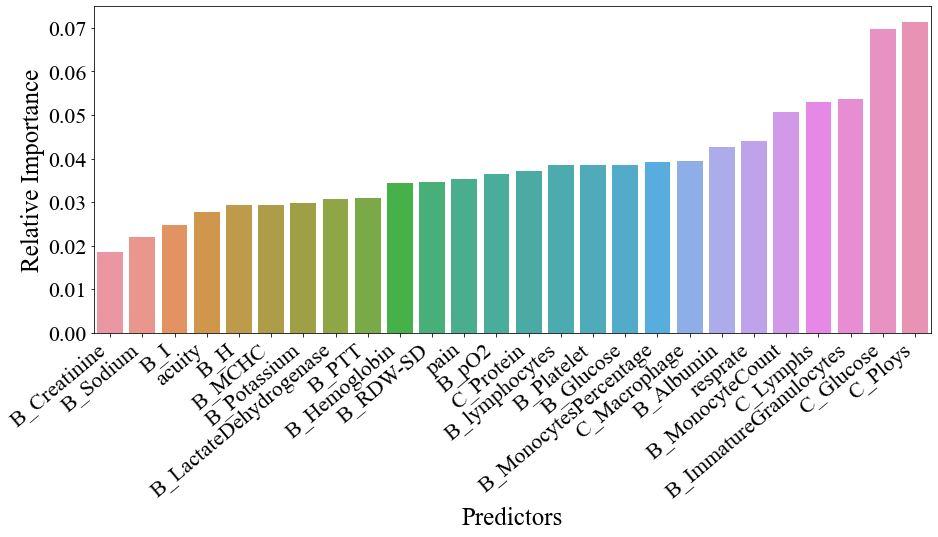

In [28]:
# visualize the weights
plt.figure(figsize=(15,6))  
ax = sns.barplot(x=rf_model_results['name'][-30:], y=rf_model_results['importance'][-30:])  # color='Gray'

plt.xticks(rotation=40,fontsize=22,ha='right')
plt.yticks(fontsize=22)

plt.ylabel('Relative Importance', fontsize=25)
plt.xlabel('Predictors', fontsize=25)
# plt.title('Feature Importances Meningitis',fontsize=25)

# plt.savefig('./image/non_standardization_importance.svg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [29]:
rf_model_results

,name,description,importance
2,B_Creatinine,B_Creatinine,0.018556
8,B_Sodium,B_Sodium,0.022011
5,B_I,B_I,0.024637
25,acuity,acuity,0.027699
4,B_H,B_H,0.029266
11,B_MCHC,B_MCHC,0.029423
7,B_Potassium,B_Potassium,0.029781
6,B_LactateDehydrogenase,B_LactateDehydrogenase,0.030707
14,B_PTT,B_PTT,0.030922
9,B_Hemoglobin,B_Hemoglobin,0.034477


In [30]:
rf_model_results1 = rf_model_results.copy()
rf_model_results1 = rf_model_results1.sort_values(['importance'],ascending=False)

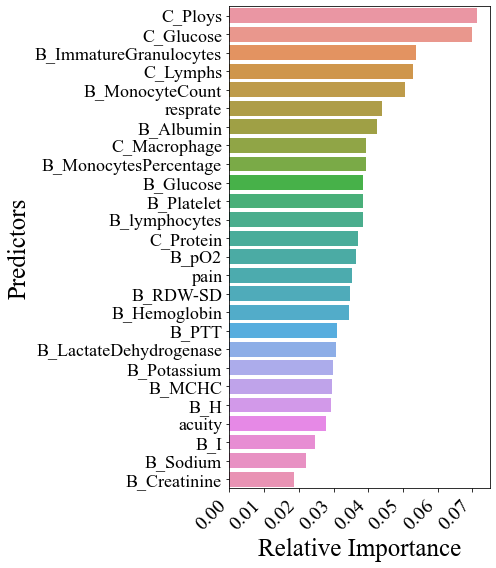

In [31]:
# visualize the weights
plt.figure(figsize=(7,8))  
ax = sns.barplot(y=rf_model_results1['name'][-30:], x=rf_model_results1['importance'][-30:])  # color='Gray'

plt.xticks(rotation=45,fontsize=20,ha='right')
plt.yticks(fontsize=18,rotation = 0)

plt.xlabel('Relative Importance', fontsize=25)
plt.ylabel('Predictors', fontsize=25)
# plt.title('Feature Importances Meningitis',fontsize=25)

plt.tight_layout()
plt.savefig('E:/CNSI_project/demo_and_data_5.0/figure_in_paper/aim1/importance.tif', dpi=300, format='tiff')

plt.show()

In [32]:
# y1_predict = rf_model.predict(X_test)
y1_predict = rf_model.predict_proba(X_test)[1]
y1_predict

array([[0.67518838, 0.32481162],
       [0.6444184 , 0.3555816 ],
       [0.54887964, 0.45112036],
       ...,
       [0.72937364, 0.27062636],
       [0.6424971 , 0.3575029 ],
       [0.65319617, 0.34680383]])

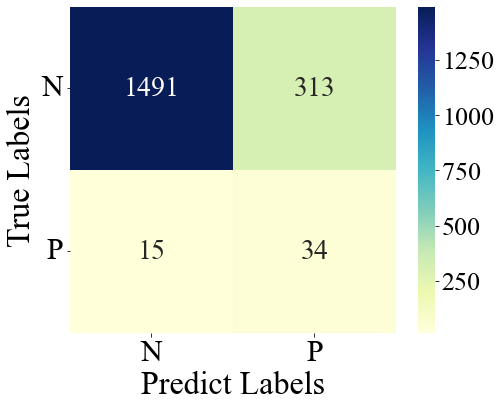

In [33]:
# generate confusion matrix
labels1 = ["N", "P"]
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y1_test.values.argmax(axis=1),y1_predict.argmax(axis=1))
ax = sns.heatmap(cm, square=True, annot=True , cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".0f")   #square=True, annot=True showing number, fmt=".0f" showing true values
# plt.matshow(cm)
# plt.title('Confusion matrix RF', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

plt.xticks([i + 0.5 for i in range(len(label1_list))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(label1_list))], labels1, rotation = 0, fontsize=30)

# plt.savefig('./image/Confusion_matrix_non_standardization_rf1.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [34]:
cm

array([[1491,  313],
       [  15,   34]], dtype=int64)

In [35]:
predict_matrix = np.zeros(cm.shape)
for i in range(cm.shape[0]):
    temp = np.sum(cm[i])
    for j in range(cm.shape[1]):
        predict_matrix[i,j] = cm[i,j]/temp
predict_matrix

array([[0.82649667, 0.17350333],
       [0.30612245, 0.69387755]])

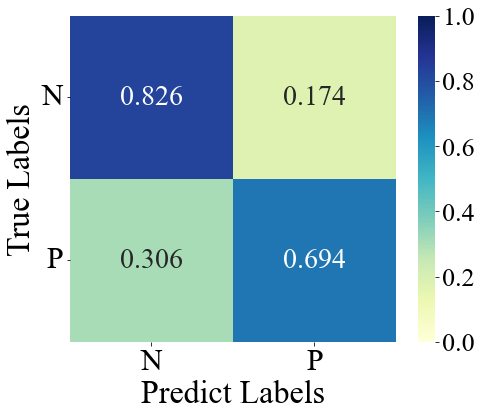

In [36]:
plt.figure(figsize = (8, 6))
# sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu")
ax = sns.heatmap(predict_matrix, square=True, annot=True ,cmap="YlGnBu", annot_kws={"fontsize":28}, fmt=".3f", vmin=0, vmax=1)
plt.xticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)
plt.yticks([i + 0.5 for i in range(len(predict_matrix))], labels1, rotation = 0, fontsize=30)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=26)

# plt.title('Confusion matrix RF', fontsize=18)
plt.ylabel("True Labels", fontsize=32)
plt.xlabel("Predict Labels", fontsize=32)

# plt.savefig('./image/Confusion_matrix_non_standardization_rf2.jpg', dpi=300, bbox_inches='tight')
# plt.tight_layout()

plt.show()

In [37]:
# calculate evaluation metric using test cohort
accuracy0 = np.round(accuracy_score(y1_test.values.argmax(axis=1), 
               y1_predict.argmax(axis=1)), decimals = 3)
print('\nRandom Forest Predictive Accuracy: ',accuracy0)


Random Forest Predictive Accuracy:  0.823


In [38]:
enc_gender = OneHotEncoder()
y_predict = enc_gender.fit_transform(y1_predict.argmax(axis=1).reshape(-1, 1)).toarray()
y_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [39]:
print('\nSummary of Random Forest Precision and Recall\n') 
print(classification_report(y1_test.values, y_predict, 
                            target_names = labels1, digits=3))


Summary of Random Forest Precision and Recall

              precision    recall  f1-score   support

           N      0.990     0.826     0.901      1804
           P      0.098     0.694     0.172        49

   micro avg      0.823     0.823     0.823      1853
   macro avg      0.544     0.760     0.536      1853
weighted avg      0.966     0.823     0.882      1853
 samples avg      0.823     0.823     0.823      1853



In [40]:
from sklearn.metrics import confusion_matrix

y_true = y1_test.values.argmax(axis=1)
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 

# The weights for each class
weights = np.bincount(y_true) / len(y_true)

# Weighted average sensitivity and specificity
weighted_avg_sensitivity = np.sum(weights * np.array([TPR, TNR]))
weighted_avg_specificity = np.sum(weights * np.array([TNR, TPR]))

print('Weighted avg sensitivity:', weighted_avg_sensitivity)
print('Weighted avg specificity:', weighted_avg_specificity)

Weighted avg sensitivity: 0.6973844787207993
Weighted avg specificity: 0.8229897463572585


In [41]:
from sklearn.metrics import confusion_matrix

y_true = y1_test.values.argmax(axis=1)
y_true = y_true.astype(int)
y_pred = y_predict.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

# Sensitivity, hit rate, recall, or true positive rate
sensitivity = TP/(TP+FN)
# Specificity or true negative rate
specificity = TN/(TN+FP) 

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.6938775510204082
specificity: 0.8264966740576497


In [42]:
y1_predict

array([[0.67518838, 0.32481162],
       [0.6444184 , 0.3555816 ],
       [0.54887964, 0.45112036],
       ...,
       [0.72937364, 0.27062636],
       [0.6424971 , 0.3575029 ],
       [0.65319617, 0.34680383]])

In [43]:
y1_test.values

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

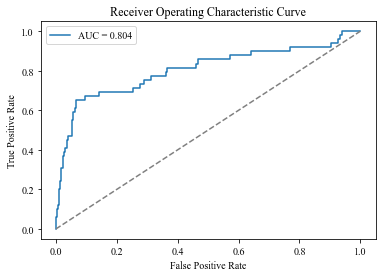

In [44]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc,roc_auc_score

# fpr, tpr, thresholds = roc_curve(label_true.ravel(), label_predict.ravel())
# auc = auc(fpr, tpr)

fpr, tpr, thresholds = roc_curve(y1_test.values[:,1], y1_predict[:,1])
auc = roc_auc_score(y1_test.values[:,1], y1_predict[:,1])

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

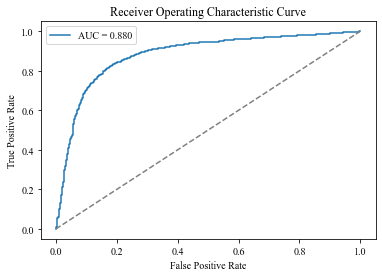

In [45]:
# Calculate AUC score and plot ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y1_test.values.ravel(), y1_predict.ravel())
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [46]:
X_test

,B_pO2,B_Albumin,B_Creatinine,B_Glucose,B_H,B_I,B_LactateDehydrogenase,B_Potassium,B_Sodium,B_Hemoglobin,...,C_Protein,B_MonocyteCount,B_ImmatureGranulocytes,B_RDW-SD,C_Lymphs,C_Macrophage,C_Ploys,resprate,pain,acuity
5720,89.850229,4.483348,1.0,101.00000,35.793566,1.040517,217.192425,4.000000,139.000000,14.9,...,20.0,0.826256,0.365723,42.672964,84.0,12.458538,0.0,16.322731,3.634950,2.377419
4424,114.000000,3.900000,0.9,104.85895,29.523877,0.588764,331.000000,4.388984,134.341068,13.2,...,30.0,0.904637,0.397485,43.443387,54.0,27.637346,1.0,16.788864,3.522559,2.114023
4368,85.000000,3.800000,0.5,104.00000,5.951567,0.803855,253.055520,3.300000,140.000000,9.6,...,33.0,0.750169,0.514931,46.669824,68.0,2.270093,1.0,17.052479,4.391601,2.150569
8425,155.458851,4.600000,1.0,98.00000,40.000000,0.000000,180.432777,4.700000,140.000000,13.3,...,44.0,0.730000,0.300000,41.400000,63.0,20.674130,3.0,16.620283,5.274110,2.439258
3948,106.622059,3.931320,1.7,99.00000,25.000000,2.000000,276.681195,4.200000,139.000000,14.3,...,56.0,0.940000,0.500000,42.200000,0.0,53.713746,0.0,17.205597,3.275473,2.380744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,103.463114,3.972587,2.1,91.00000,35.511099,0.625630,320.793071,4.800000,140.000000,9.8,...,34.0,0.409297,0.293448,45.789607,65.0,35.000000,0.0,18.646590,5.868761,2.645428
2026,170.000000,4.100000,1.3,96.00000,14.207802,0.643374,277.000000,3.400000,145.000000,10.6,...,39.0,0.959468,0.413238,42.956397,39.0,4.449361,50.0,16.858512,5.337583,2.481463
1178,184.146689,4.400000,0.7,105.00000,446.000000,0.000000,208.957255,7.300000,138.000000,13.2,...,60.0,0.410000,0.400000,41.900000,71.0,17.710989,3.0,18.000000,2.000000,2.000000
1440,101.910145,4.203328,0.6,113.00000,9.000000,1.000000,182.346621,3.700000,137.000000,14.5,...,64.0,0.385310,0.408995,43.500000,91.0,3.000000,0.0,16.000000,2.000000,2.000000


In [341]:
y_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [342]:
y1_test.values

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# AUPRC、C-index and Brier Score

FCN AUPRC: 0.211
Baseline (positive class ratio): 0.026


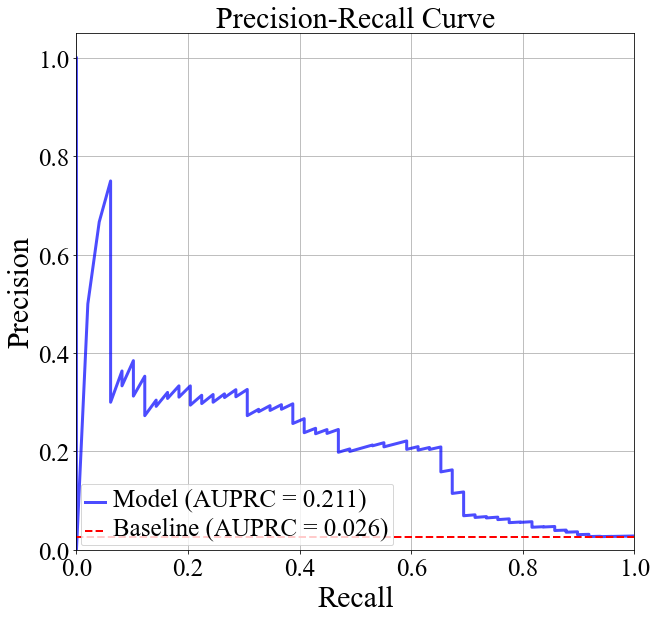

In [47]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, brier_score_loss
from lifelines.utils import concordance_index

# AUPRC
precision, recall, _ = precision_recall_curve(y1_test.values[:,1], y1_predict[:,1])
auprc = auc(recall, precision)
print(f'FCN AUPRC: {auprc:.3f}')

baseline = y1_test.Label_CultureP.value_counts()[1] / len(y1_test.values)
print(f'Baseline (positive class ratio): {baseline:.3f}')

plt.figure(figsize=(10, 9.5))
plt.plot(recall, precision, color='blue', label=f'Model (AUPRC = {auprc:.3f})', linewidth=3, alpha=0.7)

plt.axhline(y=baseline, color='red', linestyle='--', label=f'Baseline (AUPRC = {baseline:.3f})', linewidth=2)

plt.xlabel('Recall', fontsize=30, fontname='Times New Roman')
plt.ylabel('Precision', fontsize=30, fontname='Times New Roman')
plt.title('Precision-Recall Curve', fontsize=30, fontname='Times New Roman')

legend = plt.legend(loc='lower left')
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(25)

plt.grid()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=25, fontname='Times New Roman')
plt.yticks(fontsize=25, fontname='Times New Roman')

plt.show()


In [48]:
# C-index
# C-index is commonly used for survival analysis, but can also be used for classification tasks to measure the consistency of the model for survival or event ordering.
# For binary classification tasks, you can simply use the concordance_index function in lifelines.utils.
c_index = concordance_index(y1_test.values[:,1], y1_predict[:,1])
print(f'FCN C-index: {c_index:.3f}')

FCN C-index: 0.804


In [49]:
# Brier Score 
brier_score = brier_score_loss(y1_test.values[:,1], y1_predict[:,1])
print(f'FCN Brier Score: {brier_score:.3f}')

FCN Brier Score: 0.161
